In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Bidirectional, RepeatVector, TimeDistributed, Concatenate, Dropout,Attention
from tensorflow.keras.optimizers import Adam

dataset resource
https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data

# EDA

In [2]:
# Read files
# Replace path with your path
df_car = pd.read_csv('/Users/Fikry/datasets/car_prices.csv')
df_car

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [3]:
df_car.head(15)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
6,2014,BMW,M5,Base,Sedan,automatic,wbsfv9c51ed593089,ca,34.0,14943.0,black,black,the hertz corporation,69000.0,65000.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
7,2014,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pc5sb2e7128460,ca,2.0,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900.0,9800.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
8,2014,Audi,A4,2.0T Premium Plus quattro,Sedan,automatic,wauffafl3en030343,ca,42.0,9557.0,white,black,audi mission viejo,32100.0,32250.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
9,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d37e9218789,ca,3.0,4809.0,red,black,d/m auto sales inc,26300.0,17500.0,Tue Jan 20 2015 04:00:00 GMT-0800 (PST)


In [4]:
df_car.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [5]:
df_car.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [6]:
df_car.duplicated().sum()

0

Looking for every min and max value some columns

In [7]:
np.nanmin(df_car["odometer"])

1.0

In [8]:
np.nanmax(df_car["odometer"])

999999.0

In [9]:
np.nanmin(df_car["sellingprice"])

1.0

In [10]:
np.nanmax(df_car["sellingprice"])

230000.0

In [11]:
np.nanmin(df_car["condition"])

1.0

In [12]:
np.nanmax(df_car["condition"])

49.0

In [13]:
np.nanmin(df_car["mmr"])

25.0

In [14]:
np.nanmax(df_car["mmr"])

182000.0

Unique Value

In [15]:
df_car["year"].value_counts()

2012    102315
2013     98168
2014     81070
2011     48548
2008     31502
2007     30845
2006     26913
2010     26485
2005     21394
2009     20594
2004     17342
2003     13281
2002      9715
2015      9437
2001      6468
2000      5227
1999      3363
1998      2149
1997      1546
1996       851
1995       711
1994       392
1993       205
1992       132
1991        67
1990        49
1989        20
1986        11
1988        11
1985        10
1987         8
1984         5
1982         2
1983         1
Name: year, dtype: int64

In [16]:
df_car["year"].value_counts()

2012    102315
2013     98168
2014     81070
2011     48548
2008     31502
2007     30845
2006     26913
2010     26485
2005     21394
2009     20594
2004     17342
2003     13281
2002      9715
2015      9437
2001      6468
2000      5227
1999      3363
1998      2149
1997      1546
1996       851
1995       711
1994       392
1993       205
1992       132
1991        67
1990        49
1989        20
1986        11
1988        11
1985        10
1987         8
1984         5
1982         2
1983         1
Name: year, dtype: int64

In [17]:
df_car.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [89]:
df_car['saledate'] = pd.to_datetime(df_car['saledate'], errors='coerce', utc=True)

In [90]:
df_car.fillna(df_car.median(numeric_only=True), inplace=True)

In [20]:
df_car['make'].fillna(df_car['make'].mode()[0], inplace=True)
df_car['model'].fillna(df_car['model'].mode()[0], inplace=True)
df_car['trim'].fillna(df_car['trim'].mode()[0], inplace=True)
df_car['transmission'].fillna(df_car['transmission'].mode()[0], inplace=True)
df_car['body'].fillna(df_car['body'].mode()[0], inplace=True)
df_car['vin'].fillna(df_car['vin'].mode()[0], inplace=True)
df_car['color'].fillna(df_car['color'].mode()[0], inplace=True)
df_car['interior'].fillna(df_car['interior'].mode()[0], inplace=True)
df_car['saledate'].fillna(df_car['saledate'].mode()[0], inplace=True)

In [21]:
df_car.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [22]:
df_car['month'] = df_car['saledate'].dt.month
df_car['day'] = df_car['saledate'].dt.day

In [23]:
df_car['year'].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000, 1999, 1998, 1995, 1996, 1997, 1987,
       1994, 1993, 1992, 1989, 1991, 1990, 1986, 1985, 1988, 1984, 1982,
       1983], dtype=int64)

In [24]:
df_car['make'].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'lincoln', 'Jaguar', 'Volkswagen',
       'Toyota', 'Subaru', 'Scion', 'Porsche', 'bmw', 'Dodge', 'FIAT',
       'Chrysler', 'ford', 'Ferrari', 'Honda', 'GMC', 'mitsubishi', 'Ram',
       'smart', 'chevrolet', 'Bentley', 'chrysler', 'pontiac', 'Pontiac',
       'Saturn', 'Maserati', 'Mercury', 'HUMMER', 'landrover', 'cadillac',
       'land rover', 'mercedes', 'mazda', 'toyota', 'lexus', 'gmc truck',
       'honda', 'nissan', 'porsche', 'Saab', 'Suzuki', 'dodge', 'subaru',
       'Oldsmobile', 'oldsmobile', 'hyundai', 'jeep', 'Isuzu', 'dodge tk',
       'Geo', 'acura', 'volkswagen', 'suzuki', 'kia', 'audi',
       'Rolls-Royce', 'gmc', 'maserati', 'mazda tk', 'mercury', 'buick',
       'hyundai tk', 'mercedes-b', 'vw', 'Daewoo', 'chev truck',
       'ford t

In [25]:
df_car['state'].unique()

array(['ca', 'tx', 'pa', 'mn', 'az', 'wi', 'tn', 'md', 'fl', 'ne', 'nj',
       'nv', 'oh', 'mi', 'ga', 'va', 'sc', 'nc', 'in', 'il', 'co', 'ut',
       'mo', 'ny', 'ma', 'pr', 'or', 'la', 'wa', 'hi', 'qc', 'ab', 'on',
       'ok', 'ms', 'nm', 'al', '3vwd17aj4fm201708', 'ns',
       '3vwd17aj2fm258506', '3vwd17aj3fm276741', '3vwd17aj2fm285365',
       '3vwd17aj0fm227318', '3vwd17aj6fm218641', '3vwd17aj7fm223475',
       '3vwd17aj5fm297123', '3vwd17aj5fm219943', '3vwd17aj9fm219766',
       '3vwd17aj3fm259017', '3vwd17aj5fm206111', '3vwd17aj5fm273601',
       '3vwd17aj5fm221322', '3vwd17aj5fm268964', '3vwd17aj6fm231972',
       '3vwd17aj7fm222388', '3vwd17aj7fm218440', '3vwd17ajxfm315938',
       '3vwd17aj7fm229552', '3vwd17aj8fm298895', '3vwd17aj4fm236636',
       '3vwd17aj5fm225953', '3vwd17aj7fm326640', '3vwd17aj8fm239622',
       '3vwd17aj2fm261566'], dtype=object)

In [26]:
df_car['model'].unique()

array(['Sorento', '3 Series', 'S60', '6 Series Gran Coupe', 'Altima',
       'M5', 'Cruze', 'A4', 'Camaro', 'A6', 'Optima', 'Fusion', 'Sonata',
       'Q5', '6 Series', 'Impala', '5 Series', 'A3', 'XC70', 'X5', 'SQ5',
       'S5', 'Verano', 'Suburban', 'ELR', 'V60', 'X6', 'ILX', 'K900',
       'Malibu', 'RX 350', 'Versa', 'Elantra', 'Versa Note', 'A8', 'X1',
       'Enclave', 'TTS', '4 Series', 'Silverado 2500HD', 'MDX',
       'Silverado 1500', 'SRX', 'G Coupe', 'G Sedan', 'FX', 'Santa Fe',
       'Genesis', 'Equus', 'Sonata Hybrid', 'Accent', 'Veloster',
       'Elantra Coupe', 'Azera', 'Tucson', 'Genesis Coupe', 'Wrangler',
       'S-Class', 'GS 350', 'Outlander', 'C-Class', 'Mazda2', 'Rio', 'M',
       '370Z', 'Soul', 'Outlander Sport', 'SLK-Class', 'ES 350',
       'E-Class', 'Mazda3', 'Cooper Clubman', 'Cooper', 'CX-9', 'Forte',
       'Compass', 'JX', 'RX 450h', 'LR4', 'Mazda5', 'Range Rover Evoque',
       'LS 460', 'GLK-Class', 'Sportage', 'Grand Cherokee', 'MKX', 'mkt',
     

In [27]:
df_car['trim'].unique()

array(['LX', '328i SULEV', 'T5', ..., 'pure', 'EWB', 'Power Wagon'],
      dtype=object)

In [28]:
df_car['body'].unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'SuperCrew', 'CTS Coupe', 'Extended Cab',
       'E-Series Van', 'SuperCab', 'Regular Cab', 'G Convertible', 'Koup',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'convertible',
       'G37 Coupe', 'Mega Cab', 'Cab Plus 4', 'Q60 Coupe', 'Cab Plus',
       'Beetle Convertible', 'TSX Sport Wagon', 'Promaster Cargo Van',
       'GranTurismo Convertible', 'CTS-V Wagon', 'Ram Van', 'minivan',
       'suv', 'Transit Van', 'Navitgation', 'van', 'regular-cab',
       'g sedan', 'g coupe', 'hatchback', 'king cab', 'supercrew',
       'g convertible', 'coupe', 'crew cab', 'wagon', 'double cab',
       'e-series van', 'regular cab', 'quad cab', 'g37 convertible',
       'supercab', 'extended c

In [29]:
df_car['transmission'].unique()

array(['automatic', 'manual', 'Sedan', 'sedan'], dtype=object)

In [30]:
df_car = df_car[~df_car['transmission'].isin(['Sedan', 'sedan'])]

In [31]:
df_car['transmission'].unique()

array(['automatic', 'manual'], dtype=object)

In [32]:
df_car['color'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime'],
      dtype=object)

In [33]:
df_car['interior'].unique()

array(['black', 'beige', 'tan', '—', 'gray', 'brown', 'burgundy', 'white',
       'silver', 'off-white', 'blue', 'red', 'yellow', 'green', 'purple',
       'orange', 'gold'], dtype=object)

In [34]:
def outliers_handling(df, col, p1=0.25, p2=0.75):
    q1 = df[col].quantile(p1)
    q3 = df[col].quantile(p2)
    iqr = q3 - q1
    min_limit = q1 - 1.5 * iqr
    max_limit = q3 + 1.5 * iqr
    return df[(df[col] >= min_limit) & (df[col] <= max_limit)]

# Filter outliers for each column
for col in ['odometer', 'mmr', 'sellingprice']:
    df_car = outliers_handling(df_car, col)

In [35]:
state_names = {

    'ca': 'California', 'tx': 'Texas', 'pa': 'Pennsylvania', 'mn': 'Minnesota',

    'az': 'Arizona', 'wi': 'Wisconsin', 'tn': 'Tennessee', 'md': 'Maryland',

    'fl': 'Florida', 'ne': 'Nebraska', 'nj': 'New Jersey', 'nv': 'Nevada',

    'oh': 'Ohio', 'mi': 'Michigan', 'ga': 'Georgia', 'va': 'Virginia',

    'sc': 'South Carolina', 'nc': 'North Carolina', 'in': 'Indiana',

    'il': 'Illinois', 'co': 'Colorado', 'ut': 'Utah', 'mo': 'Missouri',

    'ny': 'New York', 'ma': 'Massachusetts', 'pr': 'Puerto Rico', 'or': 'Oregon',

    'la': 'Louisiana', 'wa': 'Washington', 'hi': 'Hawaii', 'qc': 'Quebec',

    'ab': 'Alberta', 'on': 'Ontario', 'ok': 'Oklahoma', 'ms': 'Mississippi',

    'nm': 'New Mexico', 'al': 'Alabama', 'ns': 'Nova Scotia'

}

df_car['state'] = df_car['state'].map(state_names)

In [36]:
df_car

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,month,day
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,California,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16 04:30:00+00:00,12,16
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,California,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16 04:30:00+00:00,12,16
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,California,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-14 20:30:00+00:00,1,14
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,California,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-28 20:30:00+00:00,1,28
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,California,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,2014-12-30 04:00:00+00:00,12,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558830,2012,Nissan,Sentra,2.0 SR,Sedan,automatic,3n1ab6ap3cl622485,Tennessee,26.0,35858.0,white,gray,nissan-infiniti lt,9950.0,10400.0,2015-07-08 10:15:00+00:00,7,8
558831,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,Florida,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,2015-07-06 23:15:00+00:00,7,6
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,Washington,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,2015-07-08 02:30:00+00:00,7,8
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,Georgia,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,2015-07-08 23:45:00+00:00,7,8


In [64]:
# Sort dataframe
df_car = df_car.sort_values(by=['day', 'month', 'year'])
df_car

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,month,day
28837,2000,jeep,wrangler,4x4 4c se,Sedan,manual,1j4fa29p0yp701279,South Carolina,19.0,161099.0,black,tan,enterprise car sales,5025.0,4000.0,2014-01-01 01:15:00+00:00,1,1
67886,2002,Ford,Focus,ZX5,Hatchback,automatic,3fafp37302r134491,South Carolina,21.0,109475.0,white,gray,jd byrider/cnac,1950.0,1800.0,2014-01-01 01:15:00+00:00,1,1
67768,2003,Infiniti,G35,Base,Sedan,automatic,jnkcv51e03m009539,South Carolina,2.0,148749.0,beige,beige,south carolina state credit union,3800.0,1200.0,2014-01-01 03:00:00+00:00,1,1
24094,2004,Ford,F-250 Super Duty,Lariat,SuperCab,automatic,1ftnx20p14ec53525,South Carolina,44.0,139133.0,blue,gray,dab auto world & leasing,8000.0,10500.0,2014-01-01 02:00:00+00:00,1,1
24127,2004,Ford,F-150,FX4,SuperCab,automatic,1ftpx04594kc73142,South Carolina,27.0,153730.0,blue,gray,primeritus remarketing/jack's auto sales,6150.0,6000.0,2014-01-01 01:15:00+00:00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68955,2015,Kia,Sorento,LX,SUV,automatic,5xykt4a62fg590277,Nevada,5.0,456.0,black,black,prestige chrysler jeep dodge,19250.0,19750.0,2014-12-31 04:00:00+00:00,12,31
68986,2015,Hyundai,Elantra,SE,Sedan,automatic,5npdh4ae9fh574412,Indiana,4.0,7661.0,gray,beige,enterprise vehicle exchange / tra / rental / t...,13850.0,9200.0,2014-12-31 04:59:00+00:00,12,31
70515,2015,Chrysler,200,Limited,Sedan,automatic,1c3cccab8fn578112,Indiana,2.0,73.0,gray,tan,enterprise vehicle exchange / tra / rental / t...,16050.0,6600.0,2014-12-31 04:59:00+00:00,12,31
73093,2015,Ford,Fusion,SE,Sedan,automatic,3fa6p0h78fr170788,Texas,5.0,3427.0,white,black,rlb investments,13700.0,16300.0,2014-12-31 02:20:00+00:00,12,31


# Plot

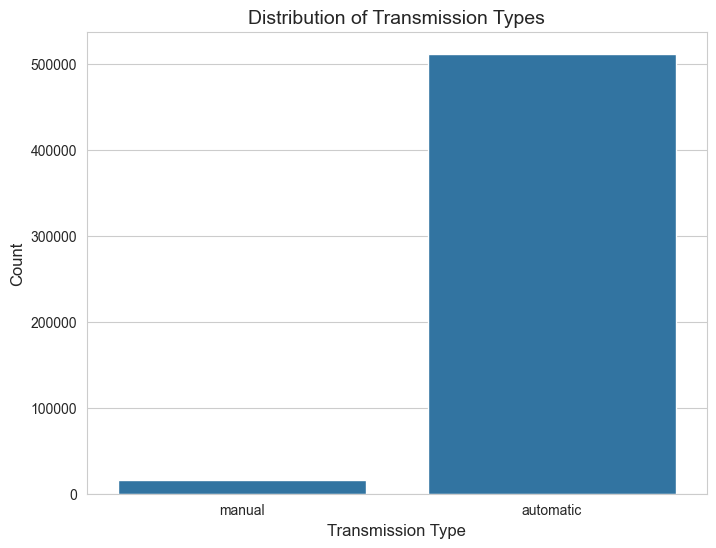

In [88]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
sns.countplot(data=df_car, x='transmission')
plt.title('Distribution of Transmission Types', fontsize=14)
plt.xlabel('Transmission Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

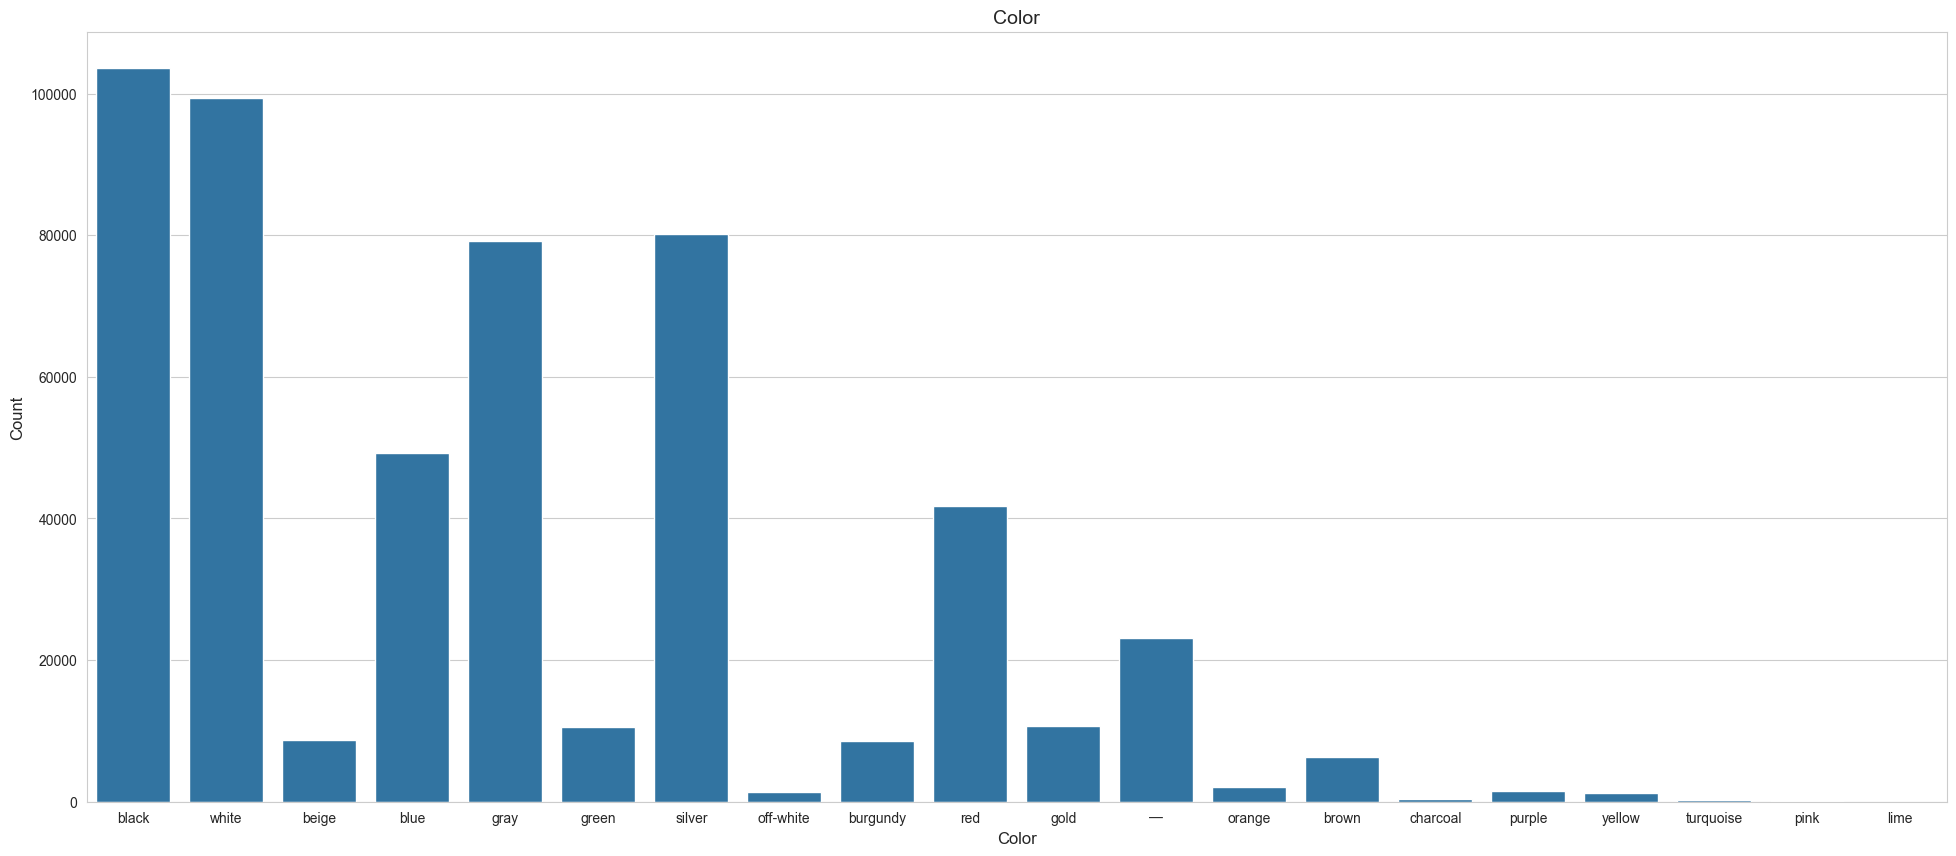

In [39]:
plt.figure(figsize=(24, 10))
sns.set_style('whitegrid')

sns.countplot(data=df_car, x='color')
plt.title('Color', fontsize=14)
plt.xlabel('Color', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

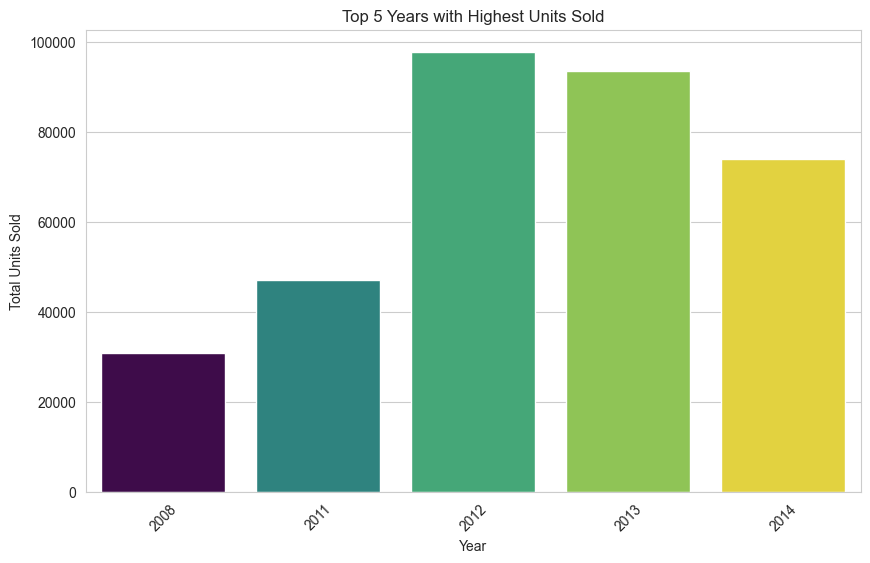

In [87]:
yearly_units = df_car['year'].value_counts().reset_index()
yearly_units.columns = ['year', 'total_units']

top_years = yearly_units.sort_values(by='total_units', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_years, x='year', y='total_units', hue='year', palette='viridis', legend=False)
plt.title('Top 5 Years with Highest Units Sold')
plt.xlabel('Year')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.show()

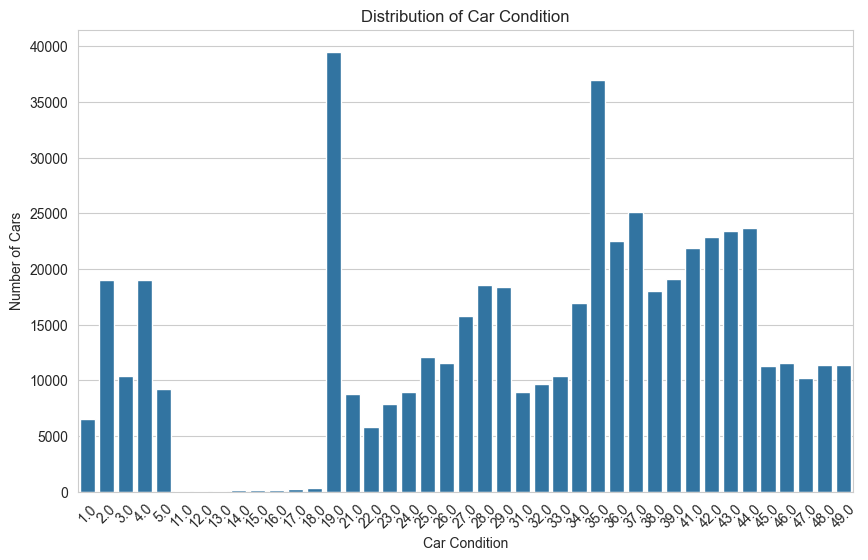

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_car, x='condition')

plt.title('Distribution of Car Condition')
plt.xlabel('Car Condition')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.show()

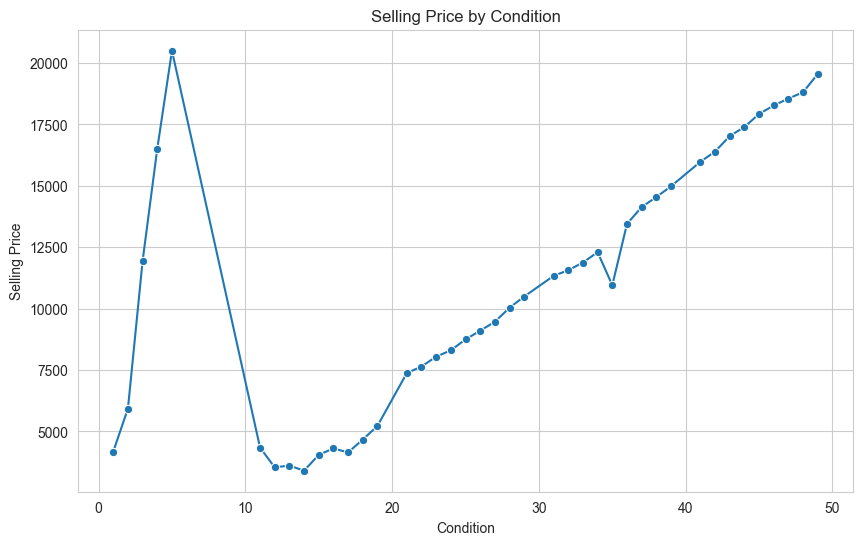

In [42]:
condition_price = df_car.groupby('condition')['sellingprice'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=condition_price, x='condition', y='sellingprice', marker='o')

plt.title('Selling Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Selling Price')
plt.show()

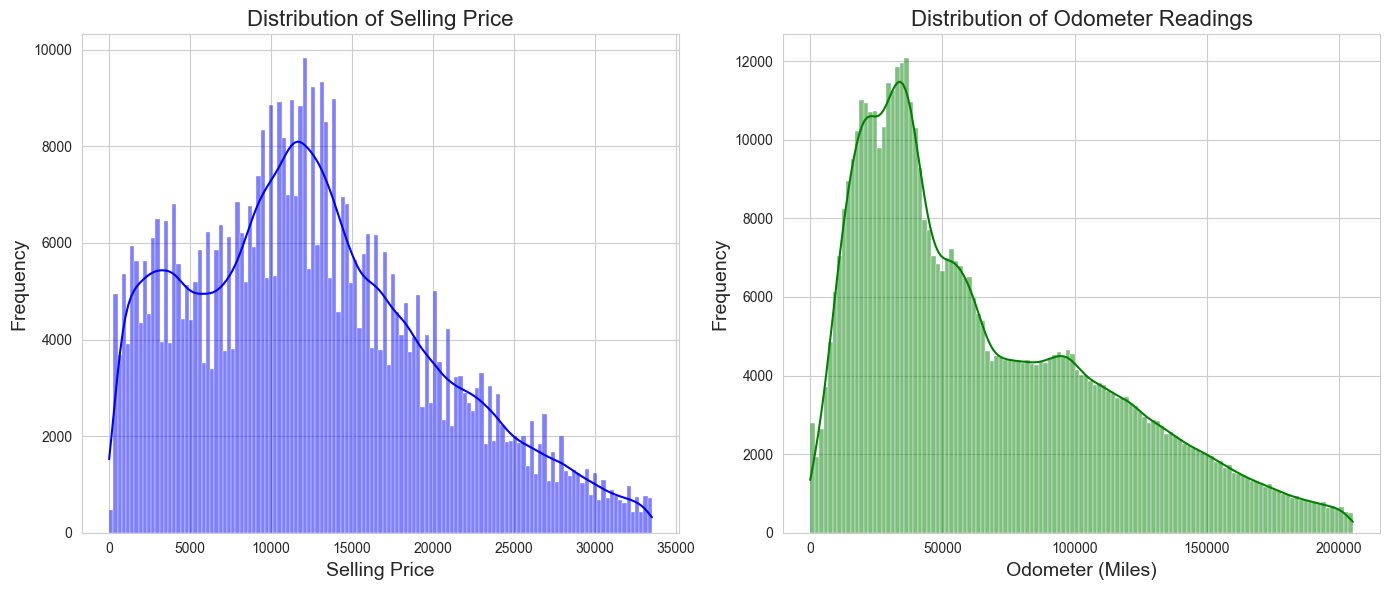

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df_car['sellingprice'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribution of Selling Price', fontsize=16)
axes[0].set_xlabel('Selling Price', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)
axes[0].grid(True)
sns.histplot(df_car['odometer'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribution of Odometer Readings', fontsize=16)
axes[1].set_xlabel('Odometer (Miles)', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)
axes[1].grid(True)
plt.tight_layout()
plt.show()

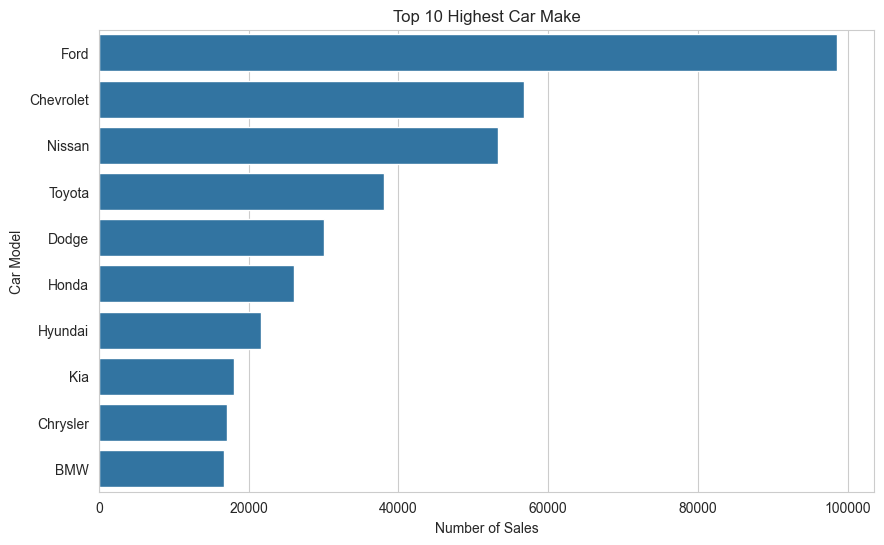

In [44]:
top_models = df_car['make'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_models.values, y=top_models.index)

plt.title('Top 10 Highest Car Make')
plt.xlabel('Number of Sales')
plt.ylabel('Car Model')
plt.show()

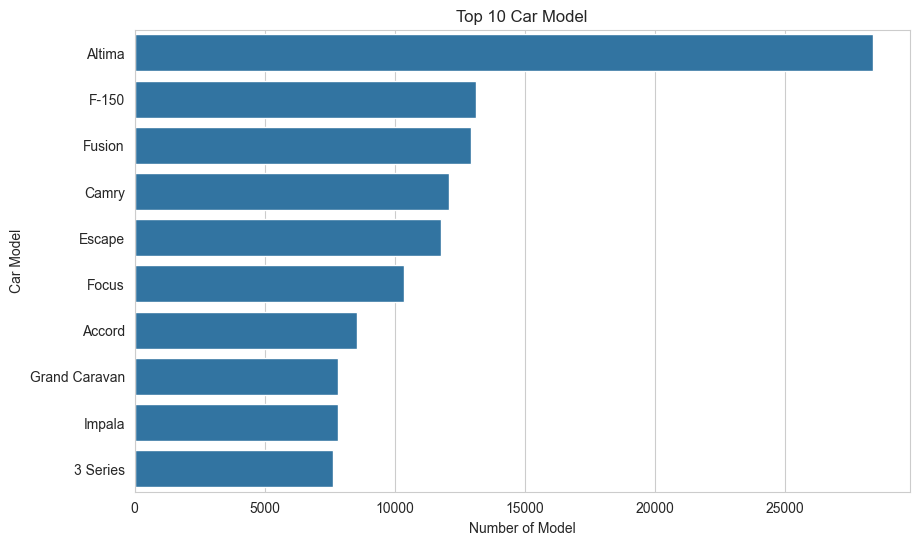

In [45]:
top_models = df_car['model'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_models.values, y=top_models.index)

plt.title('Top 10 Car Model')
plt.xlabel('Number of Model')
plt.ylabel('Car Model')
plt.show()

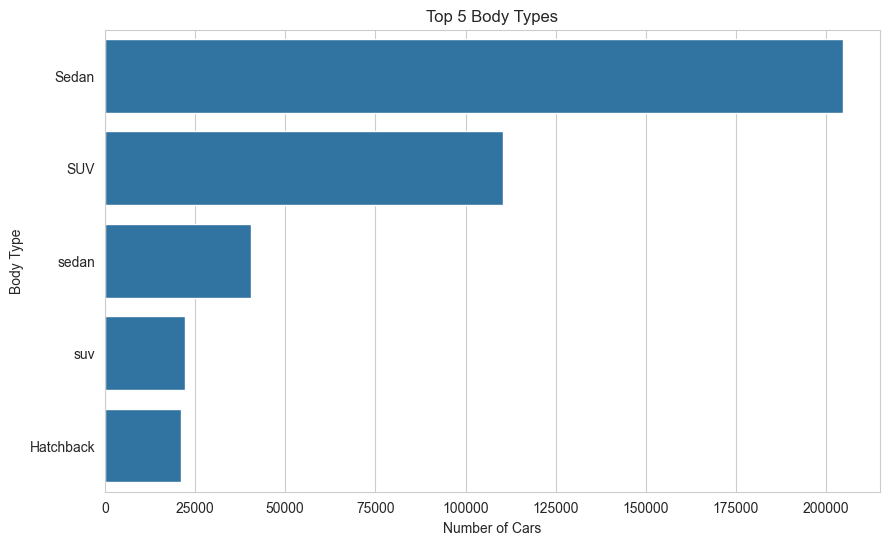

In [85]:
top_body_types = df_car['body'].value_counts().head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_body_types.values, y=top_body_types.index)

plt.title('Top 5 Body Types')
plt.xlabel('Number of Cars')
plt.ylabel('Body Type')
plt.show()

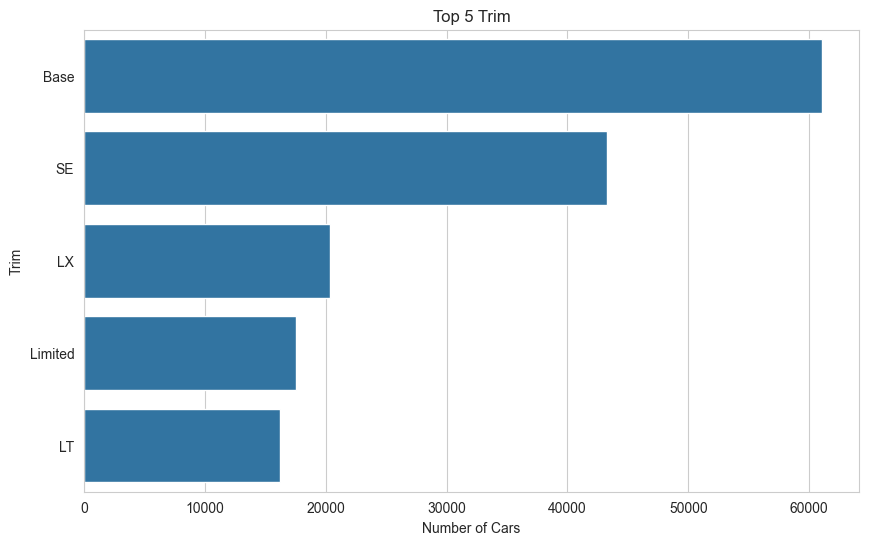

In [86]:
top_body_trims = df_car['trim'].value_counts().head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_body_trims.values, y=top_body_trims.index)
plt.title('Top 5 Trim')
plt.xlabel('Number of Cars')
plt.ylabel('Trim')
plt.show()

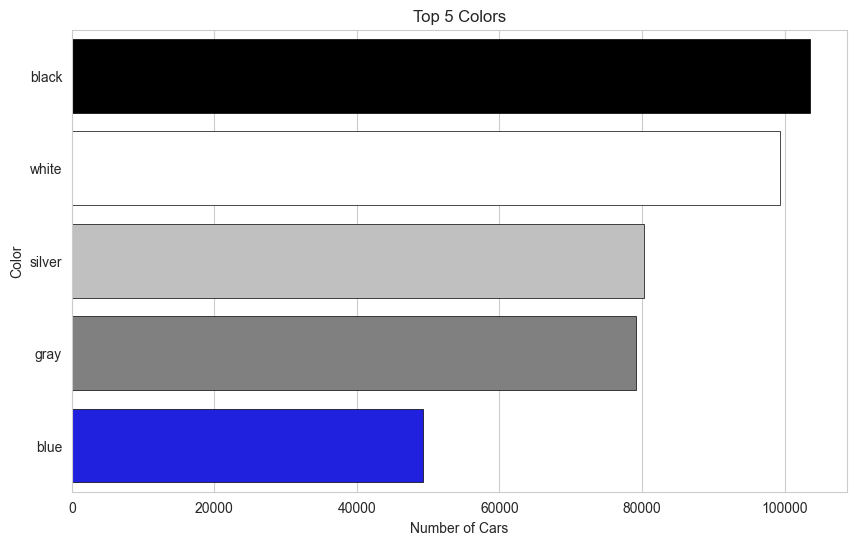

In [48]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
custom_palette = {
    'BLACK': 'black',
    'WHITE': 'white',
    'SILVER': 'silver',
    'GRAY': 'gray',
    'BLUE': 'blue',
    'RED': 'red',
    'GOLD': 'gold',
    'GREEN': 'green',
    'BEIGE': 'beige',
    'BURGUNDY': 'maroon',
    'BROWN': 'brown',
    'ORANGE': 'orange',
    'PURPLE': 'purple',
    'OFF-WHITE': 'lightgray',
    'YELLOW': 'yellow',
    'CHARCOAL': 'dimgray',
    'TURQUOISE': 'turquoise',
    'PINK': 'pink',
    'LIME': 'lime'
}

top_colors = df_car['color'].value_counts().head(5)
top_colors_palette = [custom_palette[color.upper()] for color in top_colors.index if color.upper() in custom_palette]
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=top_colors.values, y=top_colors.index, palette=top_colors_palette)

for bar in bars.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(0.5)

plt.title('Top 5 Colors')
plt.xlabel('Number of Cars')
plt.ylabel('Color')

plt.show()

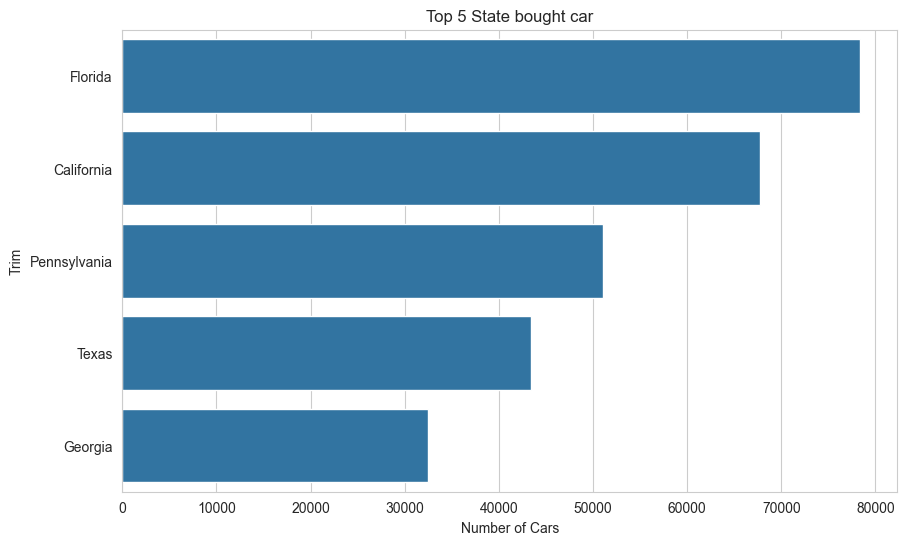

In [84]:
state_top = df_car['state'].value_counts().head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=state_top.values, y=state_top.index)
plt.title('Top 5 State bought car')
plt.xlabel('Number of Cars')
plt.ylabel('Trim')
plt.show()

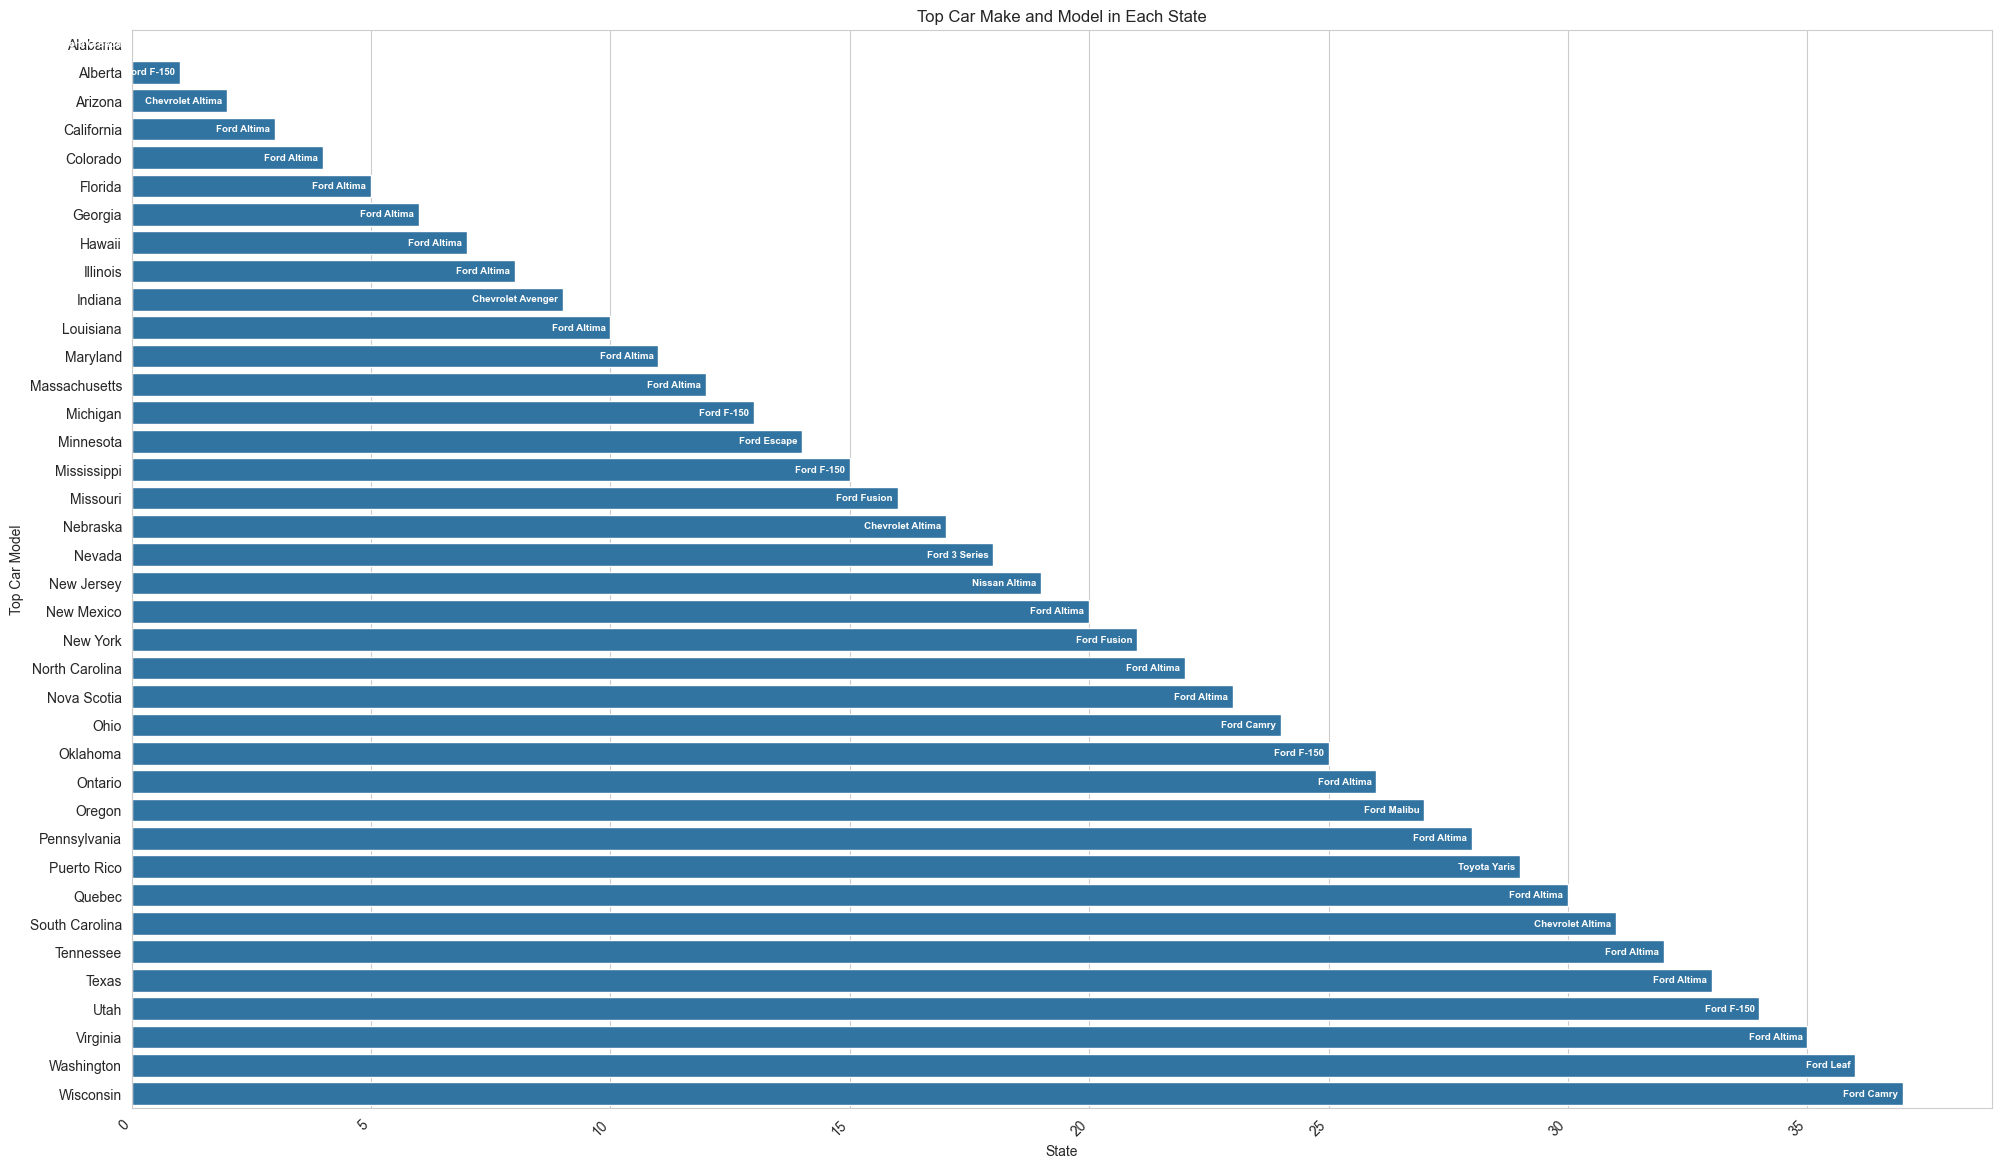

In [83]:
top_cars_per_state = (
    df_car.groupby('state')['make', 'model']
    .agg(lambda x: x.value_counts().idxmax())
    .reset_index()
)

top_cars_per_state['Top Car'] = top_cars_per_state['make'] + " " + top_cars_per_state['model']

plt.figure(figsize=(24, 14))
bars = sns.barplot(
    y='state', 
    x=top_cars_per_state.index, 
    data=top_cars_per_state, 
    dodge=False
)

for i, bar in enumerate(bars.patches):
    bar_height = bar.get_width()
    car_label = top_cars_per_state.iloc[i]['Top Car']
    plt.text(
        bar_height - 0.1,
        bar.get_y() + bar.get_height() / 2,
        car_label,
        ha='right',
        va='center',
        color='white',
        fontsize=7,
        weight='bold'
    )

plt.title("Top Car Make and Model in Each State")
plt.xlabel("State")
plt.ylabel("Top Car Model")
plt.xticks(rotation=45, ha='right')
plt.show()

# Split data

In [51]:
X = df_car[['condition', 'odometer', 'mmr', 'year', 'month','day']]
y = df_car["sellingprice"]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [52]:
print(f"Training sequences shape: {X_train.shape}, Target shape: {y_train.shape}")
print(f"Testing sequences shape: {X_test.shape}, Target shape: {y_test.shape}")
print(f"Validation sequences shape: {X_val.shape}, Target shape: {X_val.shape}")

Training sequences shape: (422412, 6), Target shape: (422412,)
Testing sequences shape: (52802, 6), Target shape: (52802,)
Validation sequences shape: (52801, 6), Target shape: (52801, 6)


In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [54]:
X_train = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_val = np.reshape(X_val_scaled, (X_val_scaled.shape[0], 1, X_val_scaled.shape[1]))
X_test = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [55]:
print(f"Training sequences shape: {X_train.shape}, Target shape: {y_train.shape}")
print(f"Testing sequences shape: {X_test.shape}, Target shape: {y_test.shape}")
print(f"Validation sequences shape: {X_val.shape}, Target shape: {X_val.shape}")

Training sequences shape: (422412, 1, 6), Target shape: (422412,)
Testing sequences shape: (52802, 1, 6), Target shape: (52802,)
Validation sequences shape: (52801, 1, 6), Target shape: (52801, 1, 6)


# Train with BiLSTM - attention

In [65]:
def model_BiLSTM(input_shape):
    inputs = Input(shape=input_shape)
    
    # First BiLSTM Layer
    x = Bidirectional(LSTM(units=89,return_sequences=True))(inputs)
    x = Dropout(0.4)(x)
    
    # Second BiLSTM Layer
    x = Bidirectional(LSTM(units=16, return_sequences=True))(x)
    
    # Third BiLSTM Layer
    x = Bidirectional(LSTM(units=8, return_sequences=True))(x)
    
    # Attention Layer
    attention_output = Attention()([x, x])
    x = Concatenate()([x, attention_output])
    
    outputs = LSTM(units=1, activation='relu')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    optimizer = Adam(learning_rate=0.0024020960831476713)
    model.compile(loss=tf.keras.losses.Huber(delta=1.0), optimizer=optimizer, metrics=['mse'])
    
    return model

input_shape = (X_train.shape[1], X_train.shape[2])
model = model_BiLSTM(input_shape)

callback = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), batch_size=16, callbacks=callback)

model.summary()

Epoch 1/1000
26401/26401 [==============================] - 131s 5ms/step - loss: 11891.8311 - mse: 197596928.0000 - val_loss: 11092.7217 - val_mse: 178422112.0000
Epoch 2/1000
26401/26401 [==============================] - 121s 5ms/step - loss: 10423.8066 - mse: 162206016.0000 - val_loss: 9673.2939 - val_mse: 145637616.0000
Epoch 3/1000
26401/26401 [==============================] - 121s 5ms/step - loss: 9049.4570 - mse: 131576968.0000 - val_loss: 8365.3643 - val_mse: 117445704.0000
Epoch 4/1000
26401/26401 [==============================] - 124s 5ms/step - loss: 7795.6641 - mse: 105461464.0000 - val_loss: 7168.0273 - val_mse: 93566664.0000
Epoch 5/1000
26401/26401 [==============================] - 122s 5ms/step - loss: 6640.9146 - mse: 83472936.0000 - val_loss: 6067.1860 - val_mse: 73643680.0000
Epoch 6/1000
26401/26401 [==============================] - 123s 5ms/step - loss: 5595.4639 - mse: 65336568.0000 - val_loss: 5096.1680 - val_mse: 57401224.0000
Epoch 7/1000
26401/26401 [====

In [66]:
model.save('bilstm_model.h5')

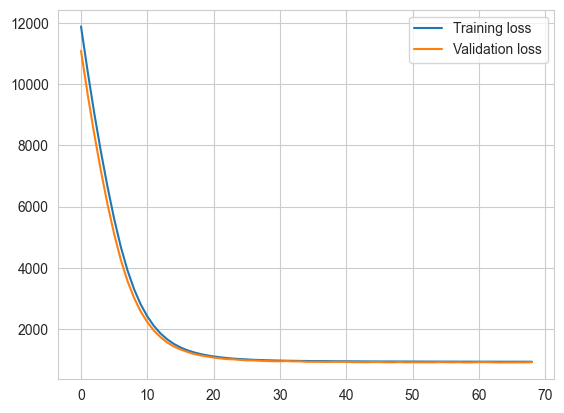

In [67]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

# Selling Price Prediction

In [68]:
predictions = model.predict(X_test)

1651/1651 [==============================] - 4s 2ms/step


In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from numpy import cov, array

predictions = predictions.flatten() 
def calculate_metrics(y_true, y_pred):
    # R² (Coefficient of Determination)
    r2 = r2_score(y_true, y_pred)

    # RMSE (Root Mean Squared Error)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    # MAPE (Mean Absolute Percentage Error)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # CC (Correlation Coefficient)
    cc = np.corrcoef(y_true, y_pred)[0, 1]

    return r2, rmse, mape, cc

r2, rmse, mape, cc = calculate_metrics(y_test, predictions)

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"Correlation Coefficient (CC): {cc:.4f}")

R²: 0.9673
RMSE: 1363.7027
MAPE: 13.2282%
Correlation Coefficient (CC): 0.9835


In [70]:
print("First 100 Predicted vs Actual Selling Prices:")
for i in range(100):
    print(f"Predicted: {predictions[i]:.2f}, Actual: {y_test.values[i]:.2f}")

First 100 Predicted vs Actual Selling Prices:
Predicted: 21371.08, Actual: 21600.00
Predicted: 9400.33, Actual: 9100.00
Predicted: 2897.32, Actual: 3500.00
Predicted: 21024.30, Actual: 23000.00
Predicted: 6630.58, Actual: 6300.00
Predicted: 15101.43, Actual: 17300.00
Predicted: 9445.68, Actual: 9700.00
Predicted: 13353.44, Actual: 12700.00
Predicted: 10874.15, Actual: 9100.00
Predicted: 27131.16, Actual: 27800.00
Predicted: 10937.99, Actual: 10600.00
Predicted: 20318.00, Actual: 21600.00
Predicted: 14181.12, Actual: 15700.00
Predicted: 3506.83, Actual: 3000.00
Predicted: 24387.33, Actual: 23300.00
Predicted: 10349.19, Actual: 10800.00
Predicted: 14180.36, Actual: 14000.00
Predicted: 29369.48, Actual: 29800.00
Predicted: 4063.71, Actual: 4200.00
Predicted: 8911.30, Actual: 8100.00
Predicted: 973.35, Actual: 1700.00
Predicted: 22403.56, Actual: 22800.00
Predicted: 22373.98, Actual: 24750.00
Predicted: 31326.10, Actual: 30300.00
Predicted: 4279.42, Actual: 4900.00
Predicted: 9226.64, Actu

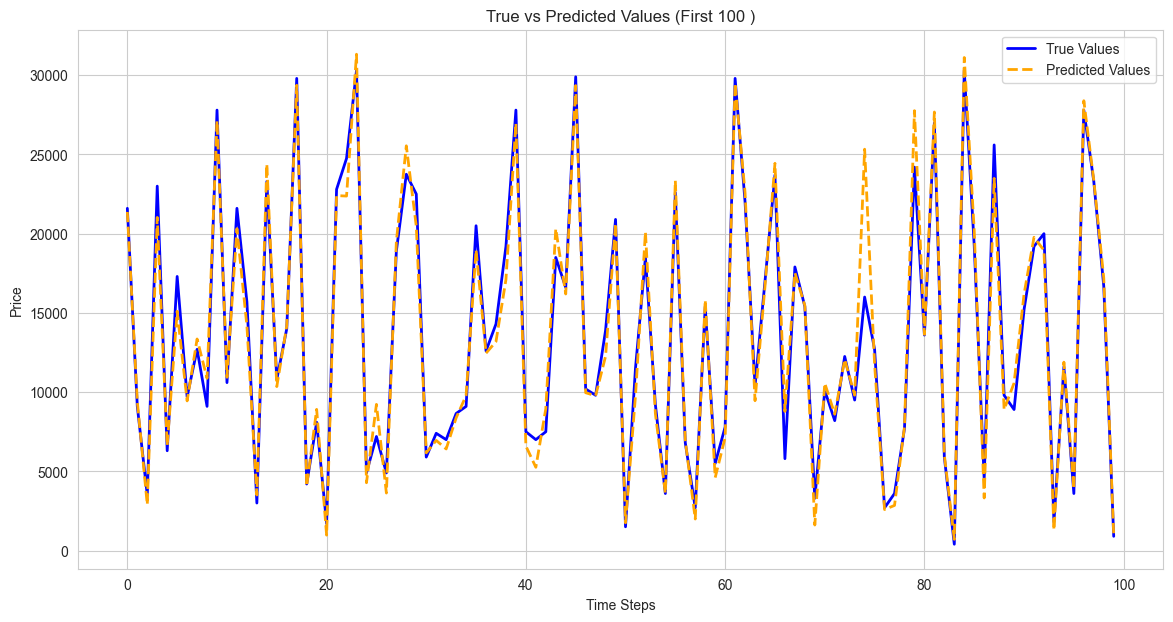

In [81]:
x_axis = np.arange(100)
plt.figure(figsize=(14, 7))
plt.plot(x_axis, y_test[:100], label='True Values', color='blue', linewidth=2)
plt.plot(x_axis, predictions[:100], label='Predicted Values', color='orange', linestyle='--', linewidth=2)
plt.title('True vs Predicted Values (First 100 )')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

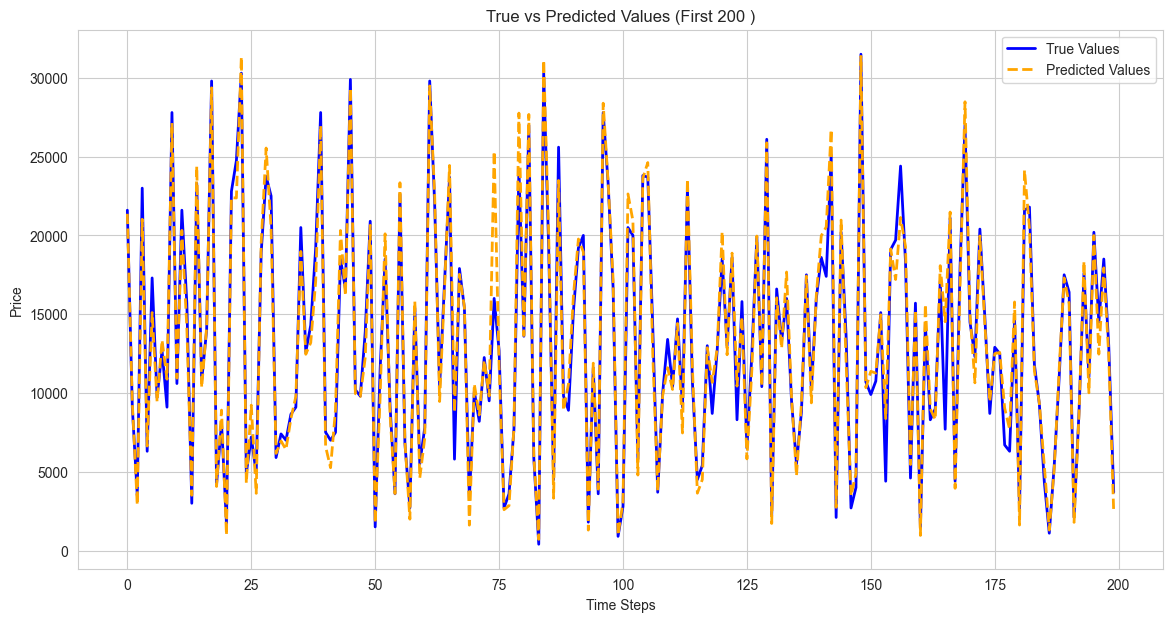

In [80]:
x_axis = np.arange(200)
plt.figure(figsize=(14, 7))
plt.plot(x_axis, y_test[:200], label='True Values', color='blue', linewidth=2)
plt.plot(x_axis, predictions[:200], label='Predicted Values', color='orange', linestyle='--', linewidth=2)
plt.title('True vs Predicted Values (First 200 )')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [75]:
print(f"Predicted: {predictions}, Actual: {y_test}")

Predicted: [21371.078   9400.333   2897.3171 ...  3085.2612 24390.363  16290.02  ], Actual: 157433    21600.0
481362     9100.0
100995     3500.0
341249    23000.0
401613     6300.0
           ...   
428383    21300.0
556494    24900.0
451860     3900.0
365458    23200.0
296605    17600.0
Name: sellingprice, Length: 52802, dtype: float64


In [78]:
results = pd.DataFrame({
    'Predicted': predictions,
    'Actual': y_test
})
results.to_csv('car_selling_price_prediction.csv', index=False)